<a href="https://colab.research.google.com/github/NathanNTC/Colab/blob/main/IA_analise_de_imagens.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'images-dataset:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F32677%2F42529%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240603%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240603T043009Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D73820d962fd8c8e3d72b9f7ef916c304b83c1afb3a68afab3f8a79f9bc3b60c52ab27c6973c6ebaa13c7846ede00febb9fee6c190ae8800f5f838d2812cc013230b7bbed9e3587ac5af5069603e995f3d3b111539f5f22ffe26197f2a1c28f172fa374053722be7cc4d7a298487614f73cc81f18e0fa05cebce6a3759ccb80fef8c2c20d066772295940cec61876e9ffbfd12734764b9fdbbdf5c3514049abce31b751f640942042edafcaa7efe87e146806906c82b273fcfaa689f5cbe6fbaeaf0fcbd0183f9192306e981b45141d77cb4330141e076a4b81659dca56f2fd0b633225e85fe2cf87aeee38d82af2083167e7d34521cf6eb44ce2d09e0137a45b'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 1088111518 bytes downloaded
Downloaded and uncompressed: images-dataset
Data source import complete.


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/images-dataset/data/cats/cat.138.jpg
/kaggle/input/images-dataset/data/cats/cat.159.jpg
/kaggle/input/images-dataset/data/cats/cat.60.jpg
/kaggle/input/images-dataset/data/cats/cat.169.jpg
/kaggle/input/images-dataset/data/cats/cat.17.jpg
/kaggle/input/images-dataset/data/cats/cat.124.jpg
/kaggle/input/images-dataset/data/cats/cat.144.jpg
/kaggle/input/images-dataset/data/cats/cat.129.jpg
/kaggle/input/images-dataset/data/cats/cat.40.jpg
/kaggle/input/images-dataset/data/cats/cat.155.jpg
/kaggle/input/images-dataset/data/cats/cat.161.jpg
/kaggle/input/images-dataset/data/cats/cat.128.jpg
/kaggle/input/images-dataset/data/cats/cat.127.jpg
/kaggle/input/images-dataset/data/cats/cat.98.jpg
/kaggle/input/images-dataset/data/cats/cat.114.jpg
/kaggle/input/images-dataset/data/cats/cat.36.jpg
/kaggle/input/images-dataset/data/cats/cat.5.jpg
/kaggle/input/images-dataset/data/cats/cat.12.jpg
/kaggle/input/images-dataset/data/cats/cat.89.jpg
/kaggle/input/images-dataset/data/cats/c

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.utils import to_categorical

# Definindo as pastas
base_dir = '/kaggle/input/images-dataset/data'  # Caminho onde os dados estão localizados no Kaggle
categories = ['bike', 'cars', 'cats', 'dogs', 'flower', 'horses', 'human']

# Carregar e processar as imagens
img_size = (128, 128)  # Tamanho das imagens (ajustável)
data = []
labels = []

for category in categories:
    path = os.path.join(base_dir, category)
    class_num = categories.index(category)

    if os.path.exists(path):  # Verificar se o diretório existe
        for img in os.listdir(path):
            try:
                img_array = load_img(os.path.join(path, img), target_size=img_size)
                img_array = img_to_array(img_array)
                data.append(img_array)
                labels.append(class_num)
            except Exception as e:
                pass

data = np.array(data, dtype="float32") / 255.0
labels = to_categorical(labels, num_classes=len(categories))

# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

def create_cnn_model(input_shape, num_classes):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

cnn_model = create_cnn_model(X_train.shape[1:], len(categories))
cnn_model.summary()

history_cnn = cnn_model.fit(X_train, y_train, epochs=10, validation_split=0.2, batch_size=32)

# salvar
cnn_model.save("/kaggle/working/cnn_model.h5")


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 57600)             0         
                                                                 
 dense (Dense)               (None, 128)               7

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
def create_dnn_model(input_shape, num_classes):
    model = Sequential()
    model.add(Flatten(input_shape=input_shape))
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(256, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

dnn_model = create_dnn_model(X_train.shape[1:], len(categories))
dnn_model.summary()

history_dnn = dnn_model.fit(X_train, y_train, epochs=10, validation_split=0.2, batch_size=32)

# salvar
dnn_model.save("/kaggle/working/dnn_model.h5")

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 49152)             0         
                                                                 
 dense_2 (Dense)             (None, 512)               25166336  
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_3 (Dense)             (None, 256)               131328    
                                                                 
 dense_4 (Dense)             (None, 7)                 1799      
                                                                 
Total params: 25299463 (96.51 MB)
Trainable params: 25299463 (96.51 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
3

10/10 [==============================] - 2s 247ms/step - loss: 0.9937 - accuracy: 0.7273
CNN - Loss: 0.993708610534668, Accuracy: 0.7272727489471436
10/10 [==============================] - 1s 84ms/step - loss: 1.7058 - accuracy: 0.3636
DNN - Loss: 1.7057925462722778, Accuracy: 0.3636363744735718


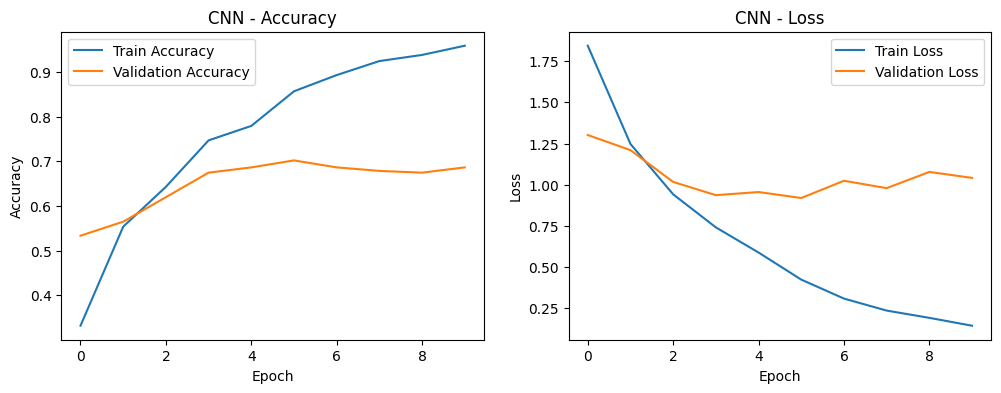

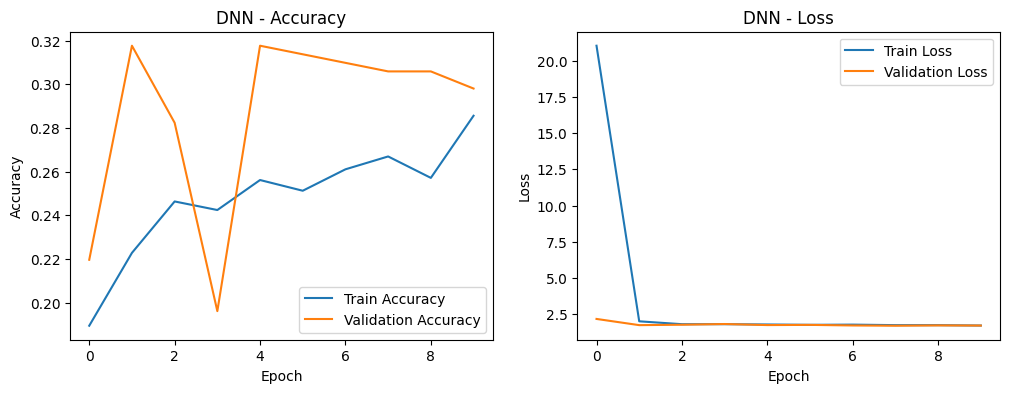

In [ ]:
# Avaliação do Modelo CNN
cnn_loss, cnn_accuracy = cnn_model.evaluate(X_test, y_test)
print(f"CNN - Loss: {cnn_loss}, Accuracy: {cnn_accuracy}")

# Avaliação do Modelo DNN
dnn_loss, dnn_accuracy = dnn_model.evaluate(X_test, y_test)
print(f"DNN - Loss: {dnn_loss}, Accuracy: {dnn_accuracy}")

# Plotar os resultados de treino e validação
def plot_history(history, title):
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title(f'{title} - Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.title(f'{title} - Loss')

    plt.show()

plot_history(history_cnn, 'CNN')
plot_history(history_dnn, 'DNN')



1/1 [==============================] - 0s 31ms/step


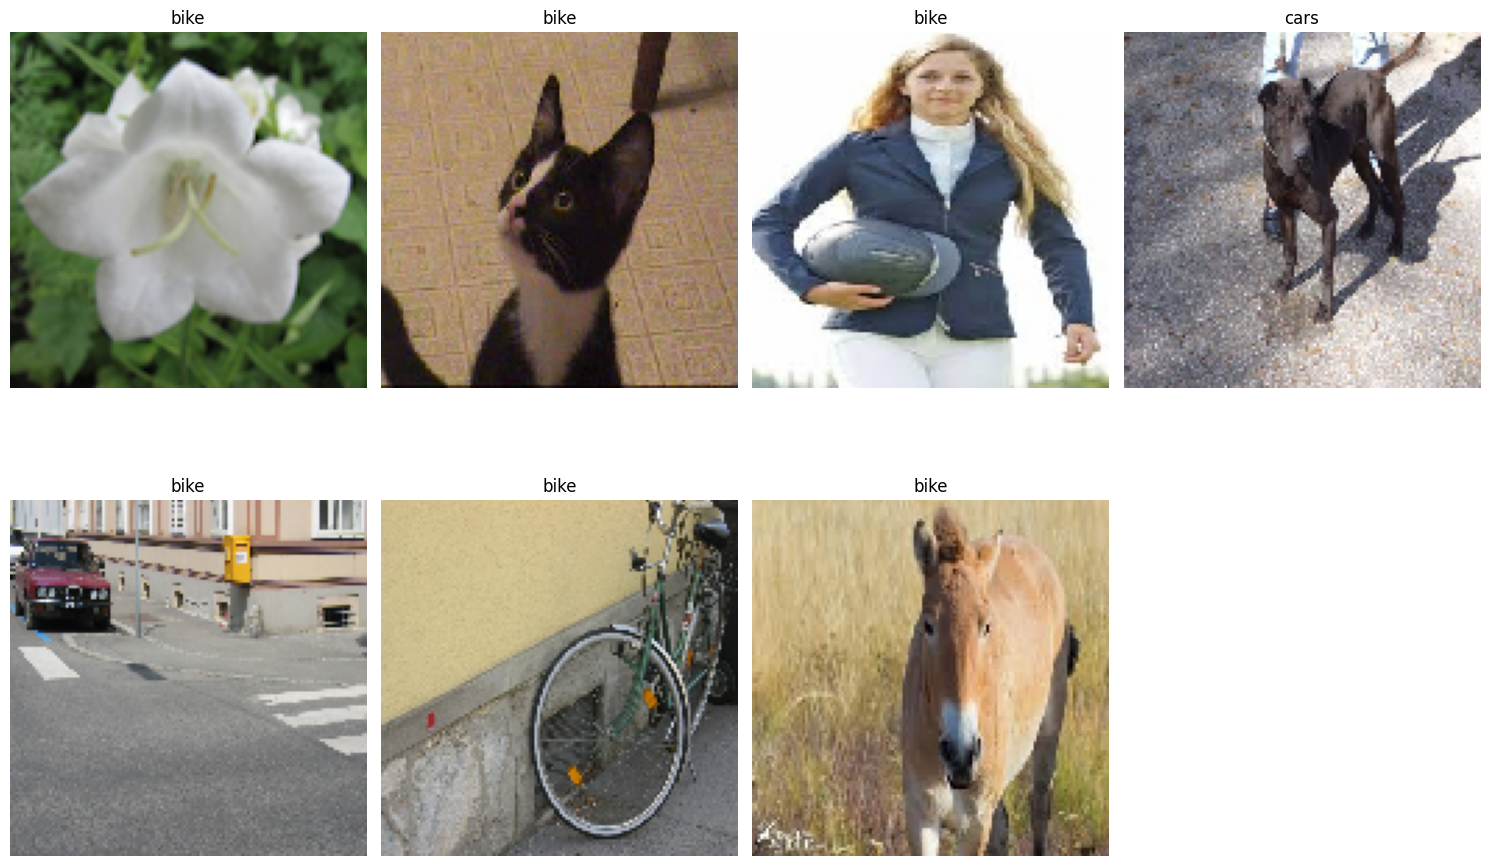

In [ ]:
import os
import random
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model
import numpy as np


# Defina o diretório onde estão suas imagens
base_dir = '/kaggle/input/images-dataset/data'

# Defina as classes
categories = ['bike', 'cars', 'cats', 'dogs', 'flowers', 'horses', 'human']

# Vamos armazenar as imagens selecionadas em uma lista
selected_images = []

# Iterar sobre as classes e selecionar uma imagem aleatória de cada uma
for category in categories:
    path = os.path.join(base_dir, category)
    if os.path.exists(path):  # Verificar se o diretório existe
        img_files = [f for f in os.listdir(path) if os.path.isfile(os.path.join(path, f))]
        if img_files:
            img_file = random.choice(img_files)
            img_path = os.path.join(path, img_file)
            selected_images.append(img_path)

# Embaralhar as imagens
random.shuffle(selected_images)

# Carregar o modelo treinado
model = load_model('/kaggle/working/dnn_model.h5')

# Plotar as imagens e prever suas classes
plt.figure(figsize=(15, 10))
for i, img_path in enumerate(selected_images, 1):
    plt.subplot(2, 4, i)
    img = load_img(img_path, target_size=(128, 128))  # Carregar a imagem
    img_array = img_to_array(img)  # Converter a imagem para um array
    img_array = np.expand_dims(img_array, axis=0)  # Adicionar uma dimensão extra
    img_array /= 255.0  # Normalizar os valores dos pixels
    prediction = model.predict(img_array)  # Prever a classe da imagem
    predicted_class = categories[np.argmax(prediction)]  # Obter a classe com a maior probabilidade
    plt.imshow(img)  # Mostrar a imagem
    plt.title(predicted_class)  # Título com a classe prevista
    plt.axis('off')  # Desativar os eixos

plt.tight_layout()
plt.show()


1/1 [==============================] - 0s 30ms/step


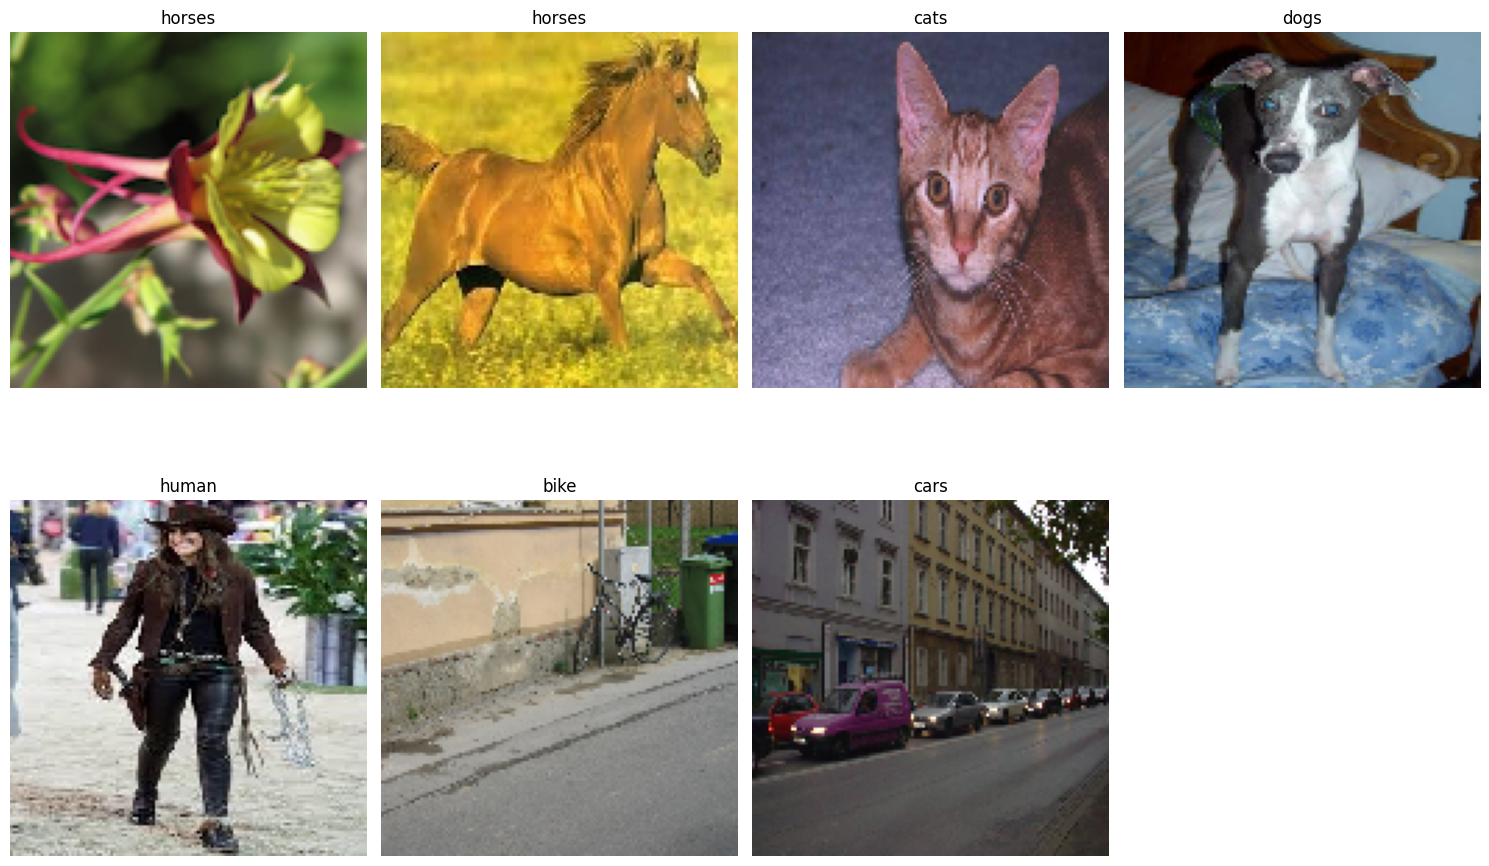

In [ ]:
import os
import random
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model
import numpy as np


# Defina o diretório onde estão suas imagens
base_dir = '/kaggle/input/images-dataset/data'

# Defina as classes
categories = ['bike', 'cars', 'cats', 'dogs', 'flowers', 'horses', 'human']

# Vamos armazenar as imagens selecionadas em uma lista
selected_images = []

# Iterar sobre as classes e selecionar uma imagem aleatória de cada uma
for category in categories:
    path = os.path.join(base_dir, category)
    if os.path.exists(path):  # Verificar se o diretório existe
        img_files = [f for f in os.listdir(path) if os.path.isfile(os.path.join(path, f))]
        if img_files:
            img_file = random.choice(img_files)
            img_path = os.path.join(path, img_file)
            selected_images.append(img_path)

# Embaralhar as imagens
random.shuffle(selected_images)

# Carregar o modelo treinado
model = load_model('/kaggle/working/cnn_model.h5')

# Plotar as imagens e prever suas classes
plt.figure(figsize=(15, 10))
for i, img_path in enumerate(selected_images, 1):
    plt.subplot(2, 4, i)
    img = load_img(img_path, target_size=(128, 128))  # Carregar a imagem
    img_array = img_to_array(img)  # Converter a imagem para um array
    img_array = np.expand_dims(img_array, axis=0)  # Adicionar uma dimensão extra
    img_array /= 255.0  # Normalizar os valores dos pixels
    prediction = model.predict(img_array)  # Prever a classe da imagem
    predicted_class = categories[np.argmax(prediction)]  # Obter a classe com a maior probabilidade
    plt.imshow(img)  # Mostrar a imagem
    plt.title(predicted_class)  # Título com a classe prevista
    plt.axis('off')  # Desativar os eixos

plt.tight_layout()
plt.show()
